L'installation [Elasticité dynamique](https://github.com/laurentperrinet/elasticite) agit comme un filtre et génère de nouveaux espaces démultipliés, comme un empilement quasi infini d'horizons. Par principe de réflexion, la pièce absorbe l'image de l'environnement et accumule les points de vue ; le mouvement permanent requalifie continuellement ce qui est regardé et entendu. 

Ce post simule une configuration de contrôle sur l'ensemble de la structure.

<!-- TEASER_END -->

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import elasticite as el
import numpy as np
#duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [3]:
%%writefile ../scenario_line_contraint.py
#!/usr/bin/env python
# -*- coding: utf8 -*-

"""

Sur une ligne de lames, on fait tourner les lames avec un mouvement relativement élastique mais exogene (prédeterminé, pas émergent)

"""

import elasticite as el
import numpy as np

class EdgeGrid(el.EdgeGrid):
    def update(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        self.lames[2, :N_lame] = 90.* np.pi/180. * np.sin(2*np.pi*(self.t)/self.period)

if __name__ == "__main__":
    import sys
    if len(sys.argv)>1: mode = sys.argv[1]
    else: mode = 'both'

    #e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=False, period=60)
    # to test writing / reading from a file
    e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=True, period=30, filename='mat/line_contraint.npy')
    el.main(e)


Overwriting ../scenario_line_contraint.py


In [4]:
#!rm mat/line_contraint.npy
%cd ..
%run  scenario_line_contraint.py writer
%cd posts

/Users/laurentperrinet/cloud_nas/science/2016-01-13_elasticite_github
recording at t= 0.0
recording at t= 0.0333333333333
recording at t= 0.0666666666667
recording at t= 0.1
recording at t= 0.133333333333
recording at t= 0.166666666667
recording at t= 0.2
recording at t= 0.233333333333
recording at t= 0.266666666667
recording at t= 0.3
recording at t= 0.333333333333
recording at t= 0.366666666667
recording at t= 0.4
recording at t= 0.433333333333
recording at t= 0.466666666667
recording at t= 0.5
recording at t= 0.533333333333
recording at t= 0.566666666667
recording at t= 0.6
recording at t= 0.633333333333
recording at t= 0.666666666667
recording at t= 0.7
recording at t= 0.733333333333
recording at t= 0.766666666667
recording at t= 0.8
recording at t= 0.833333333333
recording at t= 0.866666666667
recording at t= 0.9
recording at t= 0.933333333333
recording at t= 0.966666666667
recording at t= 1.0
recording at t= 1.03333333333
recording at t= 1.06666666667
recording at t= 1.1
recordin

In [5]:

200. * 32. * 60. / 14.

27428.571428571428

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


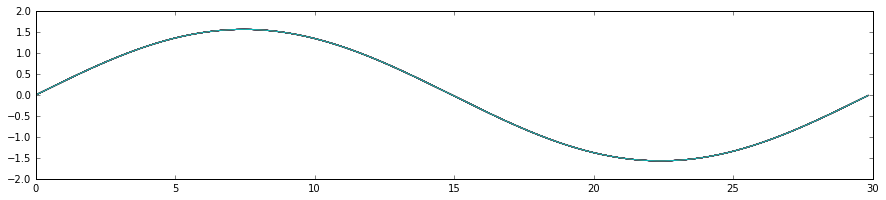

In [6]:
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
import matplotlib.pyplot as plt

z = np.load('../mat/line_contraint.npy')
fig, ax = plt.subplots(figsize=(15, 3))
#_ = ax.plot(z[:, 0])
_ = ax.plot(z[:, 0], z[:, 1:])

In [8]:
e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=True, period=30, filename='mat/line_contraint.npy')
e.render(fps=10., duration=30, fname='../files/2015-10-14_elasticite/line_contraint.mp4')

## git

In [ ]:
#!git add 2015-10-14\ élasticité,\ control\ scenario.ipynb ../mat/line_contraint.npy
!git s

In [ ]:
!git commit -m' scenario line_contraint ' -a

In [ ]:
! git push